#**Line Coding & Decoding.**

#2017331064



## Unipolar - NRZ :: Encoding

In [ ]:
#2017331064


import numpy as np
import math
import matplotlib.pyplot as plt




*   Fs   = Sampling Rate
*   N    = Bit Length
*   Bits = Digital data
*   T    = interval bit period

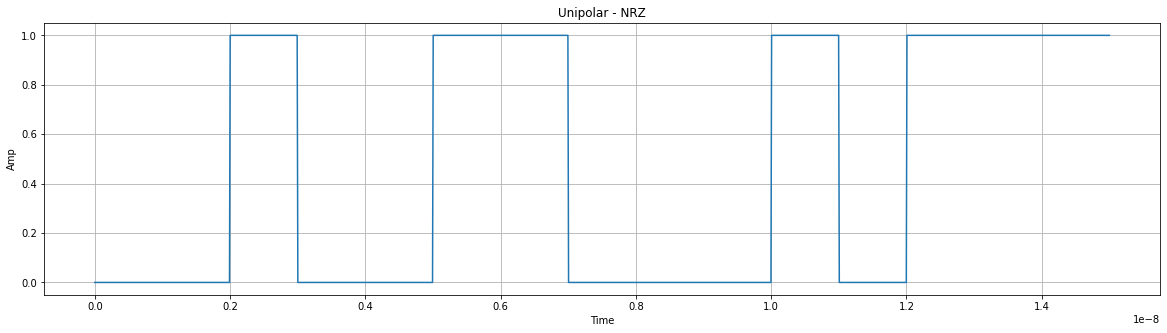

In [ ]:
Time = 1e-9   
bits = np.array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1 ,1 ]) 

T = np.linspace(0,Time,100)
N = len(bits)   
x = np.array([])

for i in range(N):
  Y = bits[i]* np.ones(len(T))
  x = np.append(x, Y)
t = np.linspace(0,N*Time,len(x))

plt.figure(figsize=(20, 5))
plt.grid('on')
plt.xlabel('Time')
plt.ylabel('Amp')
plt.title('Unipolar - NRZ')
plt.plot(t, x)
plt.show()

## **Unipolar - NRZ**  :: Decoding

In [ ]:
result = []
counter = 0
bit_rate = 1/Time 
for i in range(len(t)):
  if t[i]*bit_rate > counter:
    counter = counter + 1
    result.append(int(x[i]))

print(result)

[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1]


#**Block Coding & Decoding.**


##*NRZ-I Line :: Encoding.*


*   N    = Bit Length
*   Fs   = Sampling Rate
*   T    = interval bit period
*   mB   = mBits is considered a block


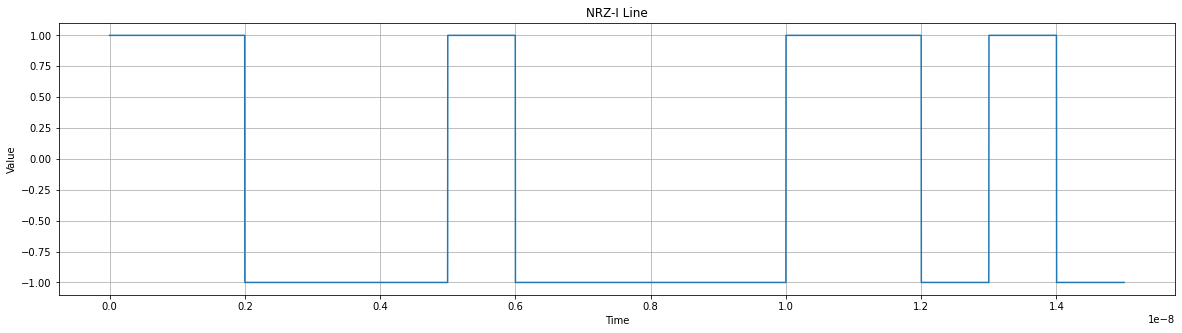

In [ ]:
bits = np.array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1 ,1 ]) 
mB=4
Time = 1e-9   
Fs = 4*bit_rate    
N = len(bits)   
T = np.linspace(0,Time, mB * 100)

x = np.array([])
last_bit = 1
for i in range(N):
  if bits[i] == 1:
    temp = (-1) * last_bit * np.ones(len(T))
    last_bit = -last_bit
  else:
    temp = last_bit * np.ones(len(T))
  x = np.append(x, temp)
t = np.linspace(0,N*Time,len(x))

plt.figure(figsize=(20, 5))
plt.grid('on')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('NRZ-I Line')
plt.plot(t, x)
plt.show()

##*NRZ-I Line :: Decoding.*


In [ ]:

result = res = []
counter = 0
last_bit = 1

for i in range(len(t)):
  if t[i]*bit_rate > counter:
    counter = counter + 1
    res=bits
    if x[i] != last_bit:
      result.append(1)
      last_bit=-last_bit
    else:
      result.append(0)

print(res)

[0 0 1 0 0 1 1 0 0 0 1 0 1 1 1]


##*4B / 5B*


Data Sequence : 0001 - Corresponding 5B value : 01001
Data Sequence : 1101 - Corresponding 5B value : 11011

The Final Result in 5B : 0100111011



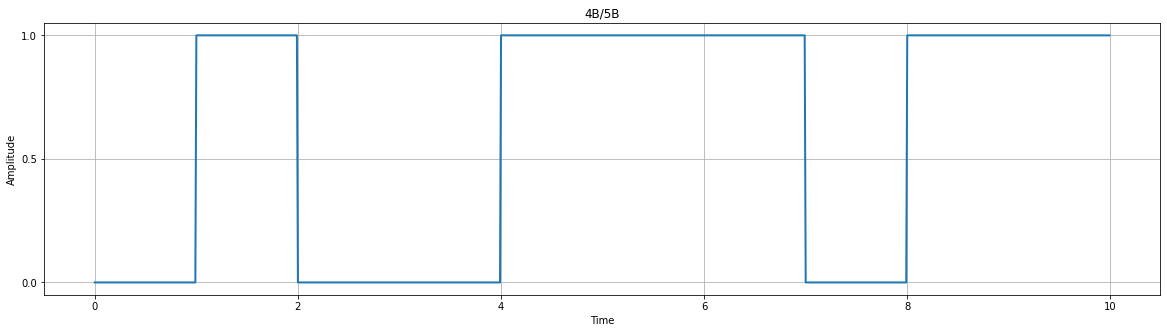

In [ ]:
conversion = {'0000': '11110',  '0001': '01001',  '0010': '10100', '0011': '10101','0100': '01010', '0101': '01011','0110': '01110', 
              '0111': '01111','1000': '10010', '1001': '10011','1010': '10110', '1011': '10111','1100': '11010', '1101': '11011',
              '1110': '11100', '1111': '11101','Q': '00000', 'I': '11111','H': '00100', 'J': '11000','K': '10001', 'T': '01101',
              'S': '11001', 'R': '00111',  }

def uniNRZ(data):
    
    x=np.empty(0)
    x=np.arange(0, len(data), 0.01)
    y=np.empty(0)

    for bit in data:
        if bit=='0':
            y=np.concatenate((y, np.zeros(100)))
        elif bit=='1':
            y=np.concatenate((y, np.ones(100)))
            
    return x,y
    
def plot_UNRZ(data):

    x,y=uniNRZ(data)
    plt.figure(figsize=(20, 5))
    # print(x)
    # print("\n \n + " )
    # print( y)
    plt.plot(x,y,linewidth=2)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title('4B/5B')
    plt.yticks([0,0.5,1])
    plt.grid('on')
    plt.show()

def check_status(seq):
    valid=['Q','I','S','J','K','T','R','H']
    i=len(seq)
    j=0
    temp=[]
   
    while j<i:
        temp_str=""
        flag=0

        for l in range(0,4):
            if j+l >= i:
                break
            if seq[j+l]!='0' and seq[j+l]!='1' and seq[j+l] not in valid:
                return "Valid Sequences are : Q,I,S,J,K,T,R,H valid control sequence only. "
            if seq[j+l] in valid:
                if(len(temp_str) > 0):
                    return "Invalid Sequence"
                temp.append(seq[j+l])
                flag=1
                j=j+l+1
                break
            temp_str+=seq[j+l]

        if flag==0 :
            j=j+4
            if len(temp_str)!=4:
                return "Invalid Sequence"
            temp.append(temp_str)
            
    
    for i in temp:
        if len(i)!=1 and len(i)!=4:
            return "Invalid Sequence"
    
    result=""

    for i in temp:
        result+=conversion[i]
        if(len(i)==1):
             print("Control Sequence "+i+" - Corresponding 5B value : "+conversion[i])
        else:
             print("Data Sequence : "+i+" - Corresponding 5B value : "+conversion[i])
    
    print("\nThe Final Result in 5B : "+result+"\n")
    return result

n='00011101'
result=check_status(n)

plot_UNRZ(result)
